# Research on apartment sales ads

The objective of this report is to define the key performence indicators of real estate value in St. Petersburg, Russia. This means determining which of the provided parameters are most valued by customers to make them more willing to pay more. 
Skills used: Data type manipulation, plotting, data slicing. 

Report completed on April 5, 2020

### Studying general information. 

In [1]:
import pandas as pd 
import numpy as np
df = pd.read_csv('real_estate_data_eng.csv', sep = '\t') #csv file not included due to private data 
df.drop('is_apartment', axis=1, inplace = True) #dropping this column because it is legacy data and irrelevant 

In [2]:
df.head(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,...,9.1,NaN,Yanino village,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,False,...,14.4,1.0,Pargolovo village,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   studio                23699 non-null  bool   
 10  open_plan             23699 non-null  bool   
 11  kitchen_area          21421 non-null  float64
 12  balcony               12180 non-null  float64
 13  locality_name         23650 non-null  object 
 14  airports_nearest      18157 non-null  float64
 15  cityCenters_nearest

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Data had to be seperated by '\t' to generate productive information from the clumped up info. 

22 columns, 23699 rows

Quantitative values: total_images, last_price, total_area, first_day_exposiiton, rooms, ceiling_height, floors_total, living area, floor, kitchen area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

Categories: is_apartment, studio, open_plan, locality_name

Initial observations
- Many missing rows from airports_nearest, cityCenters_nearest, parks_nearest and more. The df.head() shows plenty of NaN values
- All columns listed as non-null, but obviously have NaN
- All column names have good syntax and do not need to be changed 
- Column first_day_exposition has date time formatting issues 
- Column locality_name has entries 'Saint Peterburg' which may or may not be a typo that needs to be fixed 
- None of the numbers seem to be outrageous from the naked eye

### Data preprocessing

#### Data preprocessing: Identifying columns

Finding columns that have NaN and zeroes in them

In [5]:
columnWithNull = []
columnWithZero = []
for x in df.columns:
    if df[df[x].isnull()].empty == False:
        columnWithNull.append(x)
    if len(df[df[x]==0]) > 0:
        columnWithZero.append(x)
print(len(columnWithNull), 'Columns with NaNs found in:',columnWithNull); print()
print(len(columnWithZero), 'Columns with zeroes found in:',columnWithZero); print()

13 Columns with NaNs found in: ['ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

8 Columns with zeroes found in: ['total_images', 'rooms', 'studio', 'open_plan', 'balcony', 'airports_nearest', 'parks_around3000', 'ponds_around3000']



There is an object data type among the columnWithNull list so I will be careful with that

Values that don't make sense to have a zero in them are rooms (when studio is False), airports_nearest

#### Data preprocessing: Resolving NaN columns

In [6]:
#living area, kitchen area, floors
livingTotalRatio = (df['living_area'] / df['total_area']).median() #it was seen that mean and median are very close 
kitchenTotalRatio = (df['kitchen_area'] / df['total_area']).median()
floorsTotalMedian = df['floors_total'].median()
for i in range(len(df)): 
    livingAreaValue = df.iloc[i][df.columns.get_loc('living_area')]
    kitchenAreaValue = df.iloc[i][df.columns.get_loc('kitchen_area')]
    totalAreaValue = df.iloc[i][df.columns.get_loc('total_area')]
    floorsTotalValue = df.iloc[i][df.columns.get_loc('floors_total')]
    floorValue = df.iloc[i][df.columns.get_loc('floor')]
    
    if pd.isna(livingAreaValue) == True:
        df.iloc[i, df.columns.get_loc('living_area')] = totalAreaValue * livingTotalRatio
    if pd.isna(kitchenAreaValue) == True:
        df.iloc[i, df.columns.get_loc('kitchen_area')] = totalAreaValue * kitchenTotalRatio
    if pd.isna(floorsTotalValue) == True:
        if floorValue > floorsTotalMedian:
            df.iloc[i, df.columns.get_loc('floors_total')] = floorValue
        else:
            df.iloc[i, df.columns.get_loc('floors_total')] = floorsTotalMedian

I initially wanted to replace NaN values with the median,but I was afraid it would skew the cost relationship.

So I only did it if the NaN count was less than 25% of the data rows, else it would be replaced with "Unknown"

In [29]:
#Used this to check for null count
#for x in columnWithNull: print(x, '--', df[x].isna().sum())

threshold = 0.25 * len(df)
for x in ['ceiling_height', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 
          'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']: 
    df['balcony'] = df['balcony'].fillna(0)   
    if df[x].dtype == 'float64':
        if df[x].isna().sum() < threshold:
            df[x] = df[x].fillna(df[x].median())
        else:
            df[x].fillna(-1, inplace = True)
    elif df[x].dtype == 'object':
        df[x].fillna('', inplace=True)

I initially wanted to replace NaN values with the median,but I was afraid it would skew the cost relationship.

So I only did it if the NaN count was less than 25% of the data rows, else it would be replaced with "Unknown"

#### Data preprocessing: Resolving columns with zero

Fixed the NaN values. Let us take care of the unreasonable zero values by replacing them with empty strings

In [8]:
print('Fixed the NaN values. Let us take care of the unreasonable zero values by replacing them with empty strings')   
print('Count of rooms that are not studio apartments either:', len(df.query('(rooms == 0) & (studio == False)')))
df.loc[(df['rooms'] == 0) & (df['studio'] == False), 'rooms'] = -1
df.loc[df['airports_nearest'] == 0, 'airports_nearest'] = ''

print('Count of rooms that are not studio apartments either:', len(df.query('(rooms == 0) & (studio == False)'))) #Success! 

Fixed the NaN values. Let us take care of the unreasonable zero values by replacing them with empty strings
Count of rooms that are not studio apartments either: 59
Count of rooms that are not studio apartments either: 0


#### Data preprocessing: Data type conversions

The only column that crucially needs to be changed is first_day_exposition from float64 to date_time.

Other columns could be changed from float64 to int64 to save on memory, but I think we are ok with in that area

In [9]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT')

#### Step 2: Conclusion
The columns that needed a second glance were identified using a loop that null values and zeroes within each column of the data frame. These columns were stored in the lists columnWithNull and columnWithZero respectively.

##### NaN Values 
My initial thought was to replace the NaN values with the median and call it a day. However, I noticed that some areas had a significant number of NaN values and could heavily skew the relationship of different variables later. I decide to only apply the median method to columns that had less than a quarter count of NaN values. Those that did not meet this condition were given an "Unknown" value instead. This should hopefully keep some data true and still effectively clean the data. Columns 'first_day'_exposition' and 'locality_name' were special cases that were dealt with differently. I believe most of these missing values came from technical errors since many of these columns were calculated. The computer must have had a hard time calculating the distance from cityCenters_nearest and just left it blank. The ones a user submitted definitely could have contributed to the missing values as well.

##### Zero Values 
The list of columns that contained zero values only produced two columns of concern from my perspective. These were 'rooms' and 'airports_nearest'. I believed it was possible to have zero rooms if it was a studio apartment because I'm not sure if it would consider the only room a bedroom, but I'm not so sure anymore. I approached it by using .loc to replace rows with value 0 in column 'rooms' with an empty string based on if it was not a studio apartment. Then I applied .loc to replace 'airports_nearest' equal to empty strings. It is probably a user error for how they submit the count of rooms. And it is probably a technical error for computers calculating zero for airports nearest' 

##### Data Type Conversions
From the naked eye, I only saw 'first_day_exposition' that needed to be changed. This is because it was in float64 when it needed to be in date_time type. I formatted it to be year-month-day because the raw data did not have productive hour-minute-seconds information. Having just the typical date_time format does the job well here. 

### Making calculations and adding them to the table

##### the price per square meter 

In [10]:
df['price_psm'] = round(df['last_price'] / df['total_area'], 2)

##### the day of the week, month, and year that the ad was published 

In [11]:
# def day_of_week(myDate):
#     if myDate.weekday == 0:
#         return 'Monday'
#     elif myDate.weekday() == 1:
#         return 'Tuesday'      
#     elif myDate.weekday() == 2:
#         return 'Wednesday'       
#     elif myDate.weekday() == 3:
#         return 'Thursday'       
#     elif myDate.weekday() == 4:
#         return 'Friday'       
#     elif myDate.weekday() == 5:
#         return 'Saturday
#     elif myDate.weekday() == 6:
#         return 'Sunday'   
#df['day'] = df['first_day_exposition'].apply(day_of_week)
#df['month'] = df['first_day_exposition'].dt.strftime('%B') #very useful function!

df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.strftime('%Y') 
df['year'] = df['year'].astype(int) #not sure why it came out as an object 
#https://www.geeksforgeeks.org/python-pandas-series-dt-strftime/ 

##### which floor the apartment is on (first, last, or other)

In [12]:
def determine_floor(floor, maxFloor):
    if floor == 1:
        return 1 #'first'
    elif floor == maxFloor:
        return 3 #'last'
    else:
        return 2 #'other'

df['floor_type'] = df.apply(lambda x: determine_floor(x['floor'], x['floors_total']), axis = 1) #had to look up
#https://stackoverflow.com/questions/34279378/python-pandas-apply-function-with-two-arguments-to-columns/34279543 

##### the ratio between the living space and the total area, as well as between the kitchen space and the total area.

In [13]:
df['livingVStotal'] = df['living_area'] / df['total_area']
df['kitchenVStotal'] = df['kitchen_area'] / df['total_area']

In [14]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_around3000,ponds_nearest,days_exposition,price_psm,day,month,year,floor_type,livingVStotal,kitchenVStotal
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,120370.37,3,3,2019,2,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,-1.00,11.0,18.600000,1,False,...,0.0,-1.0,81.0,82920.79,1,12,2018,1,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,-1.00,5.0,34.300000,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,2,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,-1.00,14.0,90.289724,9,False,...,3.0,234.0,424.0,408176.10,4,7,2015,2,0.567860,0.172414
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.00,1,6,2018,2,0.320000,0.410000


### Conducting exploratory data analysis:

##### Parameter investigation
- Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height. 
- Plot a histogram for each parameter

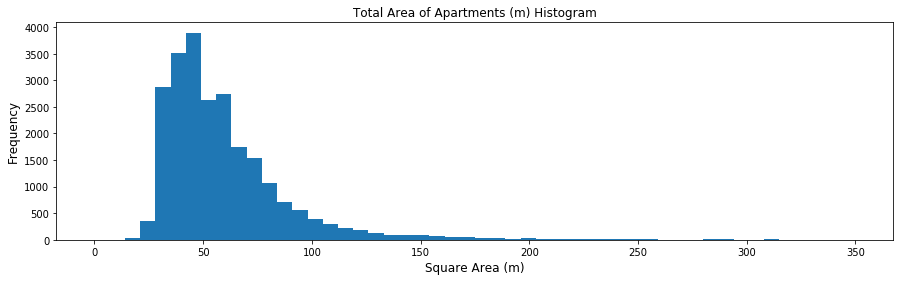

In [15]:
import matplotlib.pyplot as plt
df['total_area'].plot(kind='hist', title='Total Area of Apartments (m) Histogram', bins=50, range=(0,350), figsize=(15,4))
plt.xlabel('Square Area (m)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

I used df [ 'total_area' ].describe() to understand the range and saw that the 3rd quartile was at 69 meters, but the 
max was at 900. I stretched out my graph range to 150 to see an ok normal distribution, and 300 to curve resembling
a gamma distribution. I chose 50 bins because it bucketed the data in a fair visual format that was not too large or thin.

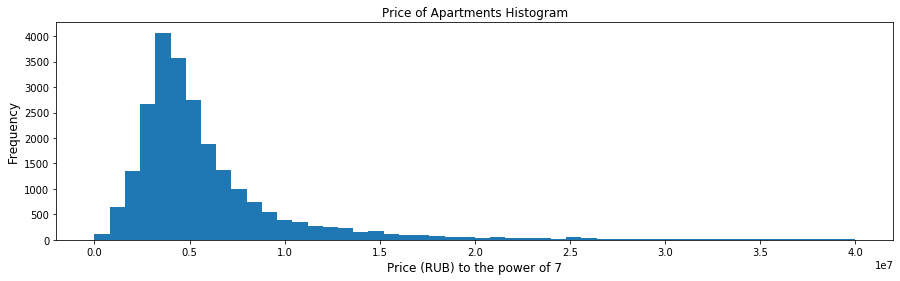

In [16]:
df['last_price'].plot(kind='hist',title='Price of Apartments Histogram',
                      bins=50,range=(0,40e+06), figsize=(15,4))                 
plt.xlabel('Price (RUB) to the power of 7', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

I also used df['last_price'].describe() to get an idea of the range of numbers. When I set the range up to 10e6, 
the price distribution was similar to a normal bell curve. However, when I set the range to up to 40e6, the distribution 
ressemble a gamma distribution as well. This would make sense if there is a directcorrelation between total area of 
apartments and price, which would then relate to the gamma distribution above.

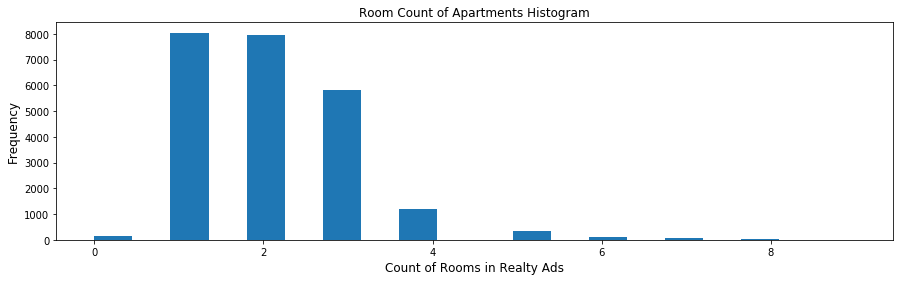

In [17]:
df['rooms'].plot(kind='hist',title='Room Count of Apartments Histogram',
                 bins=20,range=(0,9), figsize=(15,4))
plt.xlabel('Count of Rooms in Realty Ads', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Using both the .describe() and .value_counts() methods, I picked a range up to 9 that similarly follows the same
trends, but to a lesser extent. Since the room counts are discrete and not continuous (you can't have 2.23 rooms), the
histogram looks more segmented. Nonetheless, it still follows a trend where it becomes right skewed because of very large 
houses in the market that will have 10+ rooms.

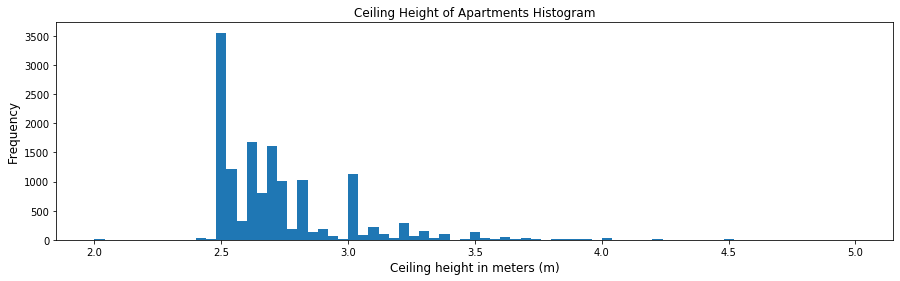

In [18]:
df['ceiling_height'].plot(kind='hist', title='Ceiling Height of Apartments Histogram',
                          bins=75,range=(2,5), figsize=(15,4))
plt.xlabel('Ceiling height in meters (m)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

I used the .describe() method to understand the range more and ball park it. This is also right skewed like the 
rest of other histograms. Also somewhat similar to a gamma distribution, but not very clean.

#### Time to Sell
- Examine the time it's taken to sell the apartment and plot a histogram. 
- Calculate the mean and median and explain the average time it usually takes to complete a sale. 
- When can a sale be considered to have happened rather quickly or taken an extra long time?

Going to assume that days_exposition will determine how long it took to sell the apartment.


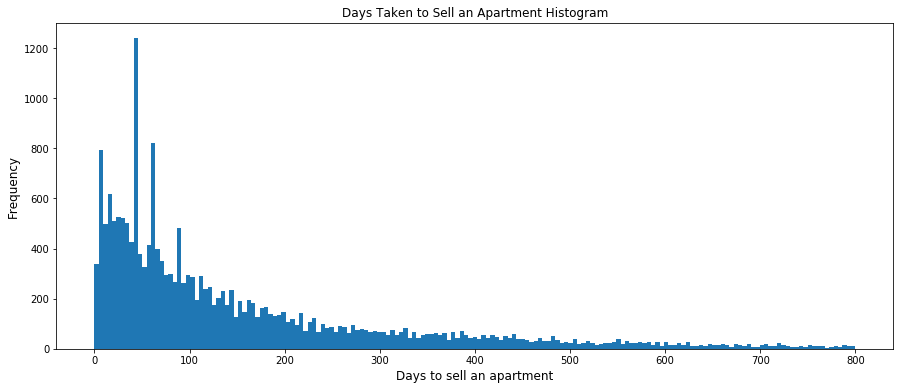

mean      180.888634
median     95.000000
Name: days_exposition, dtype: float64

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64



In [19]:
print('Going to assume that days_exposition will determine how long it took to sell the apartment.')

df['days_exposition'].plot(kind='hist', title='Days Taken to Sell an Apartment Histogram', 
                           bins=175, range=(0,800), figsize=(15,6))
plt.xlabel('Days to sell an apartment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

print(df['days_exposition'].agg(['mean','median'])); print()
print(df['days_exposition'].describe()); print()

The distribution is heavily right skewed. From the histogram and .describe() output, we can determine that 
sales under in the first quartile (45 days) coulbe be considered too quick. Sales at the third quartile and above (232 days)
can be determined as ones that took too long

In [20]:
#Remove rare and outlying values and describe the patterns you've discovered.'''
df2 = df.drop(columns=['studio','floors_total', 'floor','open_plan'])

### Price relationships
- Which factors have had the biggest influence on an apartment’s price? 
- Examine whether the value depends on the total area, # of rooms, floor (top or bottom), or the proximity to the downtown area. 
- Also study the correlation to the publication date: day of the week, month, and year.

In [21]:
plt.show()
#pd.plotting.scatter_matrix(df2, figsize=(9,9)) #doesn't work for some reason :(
df2.corr()

,total_images,last_price,total_area,rooms,ceiling_height,living_area,kitchen_area,balcony,cityCenters_nearest,parks_around3000,...,ponds_around3000,ponds_nearest,days_exposition,price_psm,day,month,year,floor_type,livingVStotal,kitchenVStotal
total_images,1.000000,0.104473,0.115352,0.099730,0.089373,0.102125,0.108446,0.048903,-0.038663,0.037085,...,-0.016799,0.010248,-0.026657,0.132780,-0.010433,0.005043,0.140411,0.024990,-0.000248,-0.018236
last_price,0.104473,1.000000,0.653675,0.361915,0.059460,0.585725,0.513476,0.008559,-0.191029,0.197840,...,0.135001,0.089844,0.081146,0.736499,0.001550,0.002779,-0.043089,0.058579,0.002498,-0.075656
total_area,0.115352,0.653675,1.000000,0.755987,0.084521,0.945972,0.659934,0.009941,-0.210655,0.200211,...,0.135556,0.087664,0.149675,0.301960,-0.004695,0.004920,-0.079912,0.063836,0.133336,-0.293956
rooms,0.099730,0.361915,0.755987,1.000000,0.089871,0.824224,0.326266,-0.016981,-0.160145,0.157451,...,0.069578,0.058314,0.127416,0.054857,-0.004730,-0.005798,-0.054605,0.025357,0.457129,-0.544114
ceiling_height,0.089373,0.059460,0.084521,0.089871,1.000000,0.095735,0.043576,0.114835,-0.040127,0.083091,...,0.021058,0.024923,0.052952,0.094066,-0.045654,-0.024164,0.145014,0.008789,0.058210,-0.048164
living_area,0.102125,0.585725,0.945972,0.824224,0.095735,1.000000,0.501927,-0.010468,-0.208809,0.208609,...,0.123296,0.082300,0.143853,0.232232,-0.004060,-0.000410,-0.072359,0.058017,0.396297,-0.443793
kitchen_area,0.108446,0.513476,0.659934,0.326266,0.043576,0.501927,1.000000,0.040247,-0.173398,0.132985,...,0.122696,0.074099,0.113490,0.382038,-0.005570,0.003495,-0.059935,0.050865,-0.308963,0.403818
balcony,0.048903,0.008559,0.009941,-0.016981,0.114835,-0.010468,0.040247,1.000000,0.056110,-0.069781,...,-0.032692,-0.020139,-0.027834,0.023376,-0.001496,0.009340,0.004570,0.069823,-0.066815,0.039430
cityCenters_nearest,-0.038663,-0.191029,-0.210655,-0.160145,-0.040127,-0.208809,-0.173398,0.056110,1.000000,-0.130406,...,-0.081089,-0.012071,-0.053203,-0.252927,0.007416,-0.007613,0.025650,-0.024798,-0.035228,0.018594
parks_around3000,0.037085,0.197840,0.200211,0.157451,0.083091,0.208609,0.132985,-0.069781,-0.130406,1.000000,...,0.243129,0.193203,0.055867,0.291687,-0.011262,-0.002624,-0.048969,0.014532,0.071320,-0.080175


1) In this correlation matrix, I am going to determine columns with greater than 0.5 correlation to be of 
significance. This includes columns: total_area (0.65), living_area (0.58), kitchen_area (0.51), and price_psm (0.736). 
We can see that all of these factors are related in terms of space. Notable mention goes to 'rooms' for it's next highest 
correlation of 0.361, which is also related to space. Seems that everyone needs their space when it comes to price!

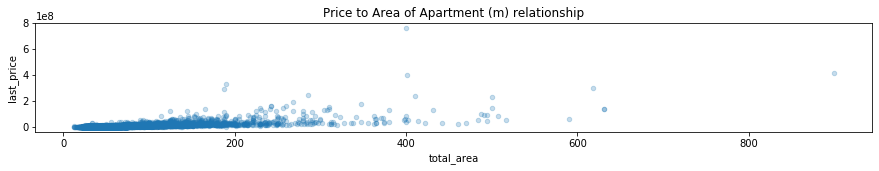

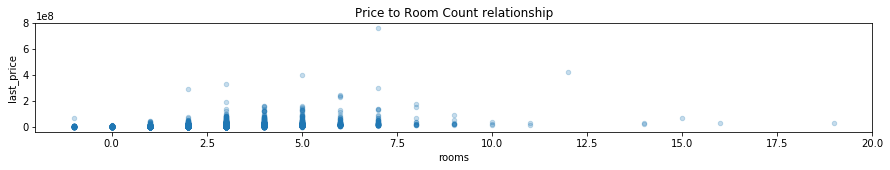

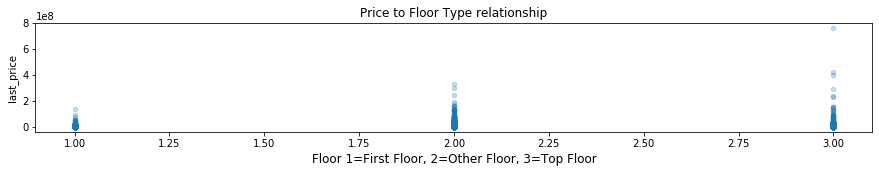

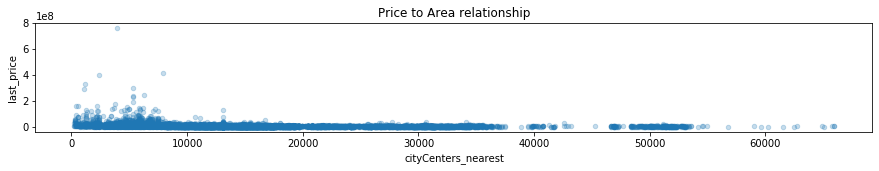

In [22]:
df2.plot(x='total_area',y='last_price',kind='scatter', title='Price to Area of Apartment (m) relationship', 
         alpha=0.25, figsize=(15,2))
plt.show()
df2.plot(x='rooms',y='last_price',kind='scatter',title='Price to Room Count relationship', alpha=0.25, figsize=(15,2))
plt.show()
df2.plot(x='floor_type',y='last_price',kind='scatter',title='Price to Floor Type relationship', alpha=0.25, figsize=(15,2))
plt.xlabel('Floor 1=First Floor, 2=Other Floor, 3=Top Floor', fontsize=12)
plt.show()
df2.plot(x='cityCenters_nearest',y='last_price',kind='scatter', title='Price to Area relationship',alpha=0.25, figsize=(15,2))
plt.show()

2) I've already said that total_area has a fair positive correlation with price, meaning that when price increases,
you can expect total_area to increase partially as well. Number of rooms also has a slight positive correlation with price. 
Floor type has a small correlation of 0.05 which nearly means that there is no relationship between the two. Distance to 
downtown actually has a slight negative relationship with price with a correlation of -.19

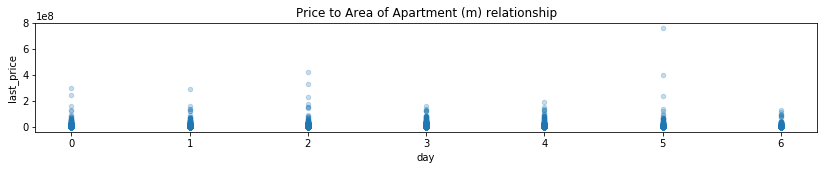

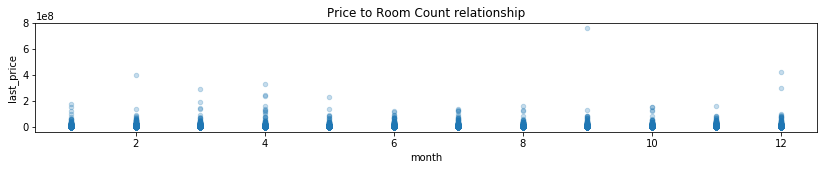

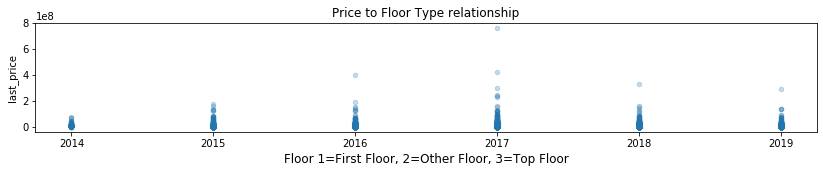

In [23]:
df2.plot(x='day',y='last_price',kind='scatter', title='Price to Area of Apartment (m) relationship', 
         alpha=0.25, figsize=(14,2))
plt.show()
df2.plot(x='month',y='last_price',kind='scatter',title='Price to Room Count relationship', alpha=0.25, figsize=(14,2))
plt.show()
df2.plot(x='year',y='last_price',kind='scatter',title='Price to Floor Type relationship', alpha=0.25, figsize=(14,2))
plt.xlabel('Floor 1=First Floor, 2=Other Floor, 3=Top Floor', fontsize=12)
plt.show()

3) The correlation value for day, month, and year are almost zero; meaning that there is no supposed relationship 
between the publication date and price

#### Localities focus
- Select the 10 localities with the largest number of ads then calculate the avg price per square meter in these localities. 
- Determine which ones have the highest and lowest housing prices. 
- You can find this data by name in the ’locality_name’ column.

In [24]:
#df.pivot_table(index='locality_name',values=['total_images','price_psm'],).sort_values(by='total_images',ascending=False).head(10)
LargestNumAds = df.groupby('locality_name').sum().sort_values(by='total_images',ascending=False).head(10)
LargestNumAds.reset_index()
df['TopAds'] = (df['locality_name'].where(df['locality_name'].isin(LargestNumAds.index), 'Others'))
(df.pivot_table(index='TopAds',
                values=['price_psm','last_price'],
                aggfunc='mean').sort_values(by='last_price',ascending=False)
)

,last_price,price_psm
TopAds,,
Saint Peterburg,8.062507e+06,114849.008793
Pushkin,6.469036e+06,103125.819377
Pargolovo village,4.488075e+06,90175.913089
Kudrovo village,4.234158e+06,92473.547559
Shushary village,4.108082e+06,78677.364318
Kolpino,3.964021e+06,75424.579112
Vsevolozhsk,3.789068e+06,68654.473970
Murino village,3.652361e+06,85681.762572
Gatchina,3.488337e+06,68746.146515


Going to assume total_images is the count of ads. Saint Peterburg has the highest housing prices while Vyborg 
has the lowest housing prices. When we sort by housing price, we also notice that price per square meter
also follows suit. All of these localities have greater prices than the "other" category.

#### Finding the downtown border
- Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. 
- Select apartments in Saint Petersburg (‘locality_name’). Your task is to pinpoint which area is considered to be downtown. 
- In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. 
- Calculate the avg price for each km and plot a graph to display how prices are affected by the distance to the city center. 
- Find a place on the graph where it shifts significantly. That's the downtown border.

Average price for each km: 1079.83 RUB


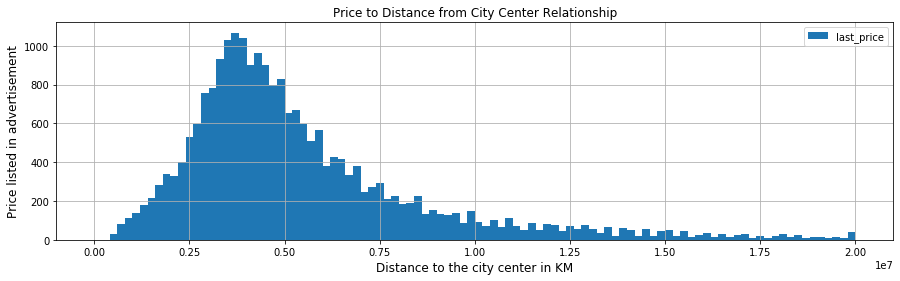

In [25]:
df['cityCenterKM'] = round(df['cityCenters_nearest'], 0)
avgPricePerKM = df['last_price'] / df['cityCenterKM']
print('Average price for each km:', round(avgPricePerKM.mean(),2), 'RUB')
df.plot(x='cityCenterKM',y='last_price',kind='hist',title='Price to Distance from City Center Relationship', bins=100,
        range=(0,20000000), figsize=(15,4),grid=True) 
plt.xlabel('Distance to the city center in KM',fontsize=12)
plt.ylabel('Price listed in advertisement',fontsize=12)
plt.show()

This relationship is also right skewed. Right before the skew starts, we see a more controlled curve on the left
side of the peak that is closer to resembling a normal bell curve. I want to say that most apartments that are on the left 
side of the peak (smaller distance to city center). The downtown border is denoted by the peak which is approximately 3956 km

#### Downtown Analysis
- Select all the apartments in the downtown and examine correlations between the following parameters: total area, price, number of rooms, ceiling height. 
- Also identify the factors that affect an apartment’s price: number of rooms, floor, distance to the downtown area, and ad publication date. 
- Draw your conclusions. Are they different from the overall deductions about the entire city?

In [26]:
downtown = df.query('cityCenterKM < 4000').filter(['last_price', 
                                                   'total_area','rooms','ceiling_height','floor','cityCenterKM',
                                                   'first_day_exposition','month','year'])
downtown.corr()

,last_price,total_area,rooms,ceiling_height,floor,cityCenterKM,month,year
last_price,1.000000,0.532068,0.244412,-0.017161,0.223015,-0.094043,-0.011389,-0.041950
total_area,0.532068,1.000000,0.756874,0.027854,0.201743,-0.109759,-0.038514,-0.090224
rooms,0.244412,0.756874,1.000000,0.003422,0.115664,-0.051253,-0.060478,-0.061055
ceiling_height,-0.017161,0.027854,0.003422,1.000000,0.018244,-0.029008,-0.019400,0.088243
floor,0.223015,0.201743,0.115664,0.018244,1.000000,0.085670,0.027943,-0.031864
cityCenterKM,-0.094043,-0.109759,-0.051253,-0.029008,0.085670,1.000000,-0.007646,0.064785
month,-0.011389,-0.038514,-0.060478,-0.019400,0.027943,-0.007646,1.000000,-0.234762
year,-0.041950,-0.090224,-0.061055,0.088243,-0.031864,0.064785,-0.234762,1.000000


Again, last_price has a strong correlation with with total_area, but pretty much no relation to ceiling_height. 
Surprsingly, rooms has a slightly smaller correlation with price than the original dataframe. 
It obviously has a strong correlation with total_area, but no relation with ceiling height. Total_area also has little to 
no relationship with ceiling height.

Text(0, 0.5, 'Price listed in advertisement')

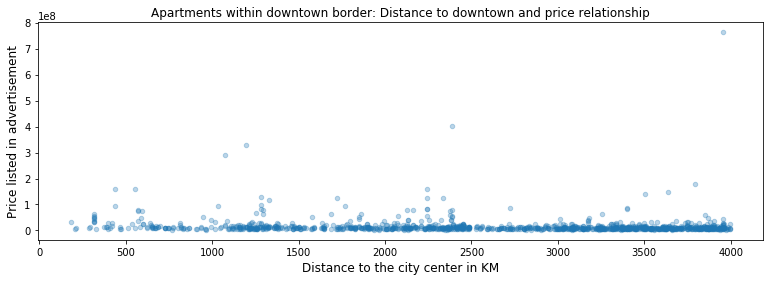

In [27]:
downtown.plot(x='cityCenterKM',y='last_price', title= 'Apartments within downtown border: Distance to downtown and price relationship',
              kind='scatter',figsize=(13,4),alpha=0.3)
plt.xlabel('Distance to the city center in KM',fontsize=12)
plt.ylabel('Price listed in advertisement',fontsize=12)

Surprisingly enough, the correlation is -0.09 which is practically no relationship between city center distance and 
price. I assume that people don't care about distance to downtown as much since it's already within the border.

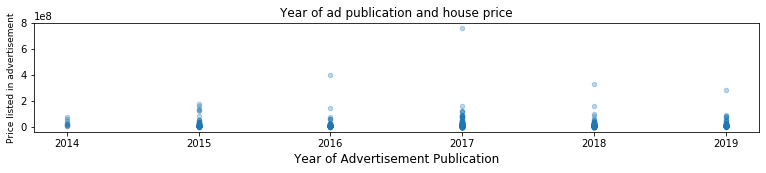

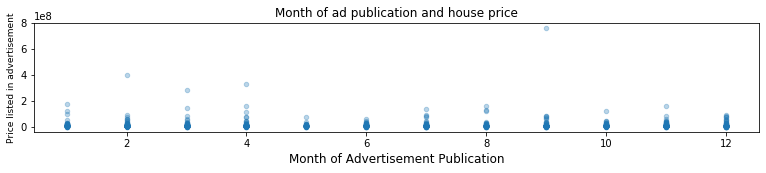

In [28]:
downtown.plot(x='year',y='last_price',title='Year of ad publication and house price',kind='scatter',figsize=(13,2),alpha=0.3)
plt.xlabel('Year of Advertisement Publication',fontsize=12)
plt.ylabel('Price listed in advertisement',fontsize=9)
plt.show()
downtown.plot(x='month',y='last_price',title='Month of ad publication and house price',kind='scatter',figsize=(13,2),alpha=0.3)
plt.xlabel('Month of Advertisement Publication',fontsize=12)
plt.ylabel('Price listed in advertisement',fontsize=9)
plt.show()

The correlation for both year and month in regards to price are -0.01 and -0.04 respectively. These are both very low
and most likely have no impact in the change in price.

### Overall conclusion

Viewing the histograms for various variables in the dataframe, we noticed almost all of them had a right skewed distribution. This is expected because there are going to be apartment listings targetted towards more wealthy individuals which would include a greater number of rooms, area, ceiling height, etc. If you cut out the skewed listings, the dsitribution looks closer to a normal bell curve. 

The only significant correlations with listing price are seen in total_area, living_area, kitchen_area, and price_psm. These variables all had positive correlations greater than 0.5, which shows that space is the greatest factor of price! The next highest correlation was rooms, which is also related in that area. 

We identified that the downtown border is approximately 4000 km away from the heart of the city. When we look specifically at apartments in downtown, the correlation of total_area and price is still greater than 0.5, but slightly weaker. We also notice that distance to city has little to no relationship; probably because the apartment is already within the city. Other variables we checked for such as rooms and month have weaker correlations. 

Space is the most important factor! 